# Make_aug_model

# verify augmentated malignant set

In [111]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [112]:
def crawl_folder(folder_path): #search_str 찾고자 하는 string 
    search_path_list=[]
    fileList = os.walk(folder_path).next()[2]
    subFolder_list = os.walk(folder_path).next()[1]
    if(len(fileList)!=0):
        for j in range(len(fileList)):
            search_path_list.append(folder_path+'/'+fileList[j])
    if len(subFolder_list)==0:
        return search_path_list
    else: 
        for i in range(len(subFolder_list)):
            search_path_list.extend(crawl_folder(folder_path+'/'+subFolder_list[i] ))
        return search_path_list


In [113]:

mal_aug_path='/home/user01/hdd1/ASAN_Mal_crop_aug/'
mal_file_paths=crawl_folder(mal_aug_path)
print '# malignant : ',len(mal_file_paths)
img=np.load(mal_file_paths[0])
print np.shape(img)


# malignant :  2228
(3888, 64, 64, 1)


# Malignant 1 

## Verify Label Data

In [114]:
print mal_file_paths[0]
print mal_file_paths[1]

lab=np.load(mal_file_paths[1])
print lab

/home/user01/hdd1/ASAN_Mal_crop_aug//001_3518_crop_target_3518_np_img.npy
/home/user01/hdd1/ASAN_Mal_crop_aug//001_3518_crop_target_3518_np_lab.npy
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


## Verify Image Data 

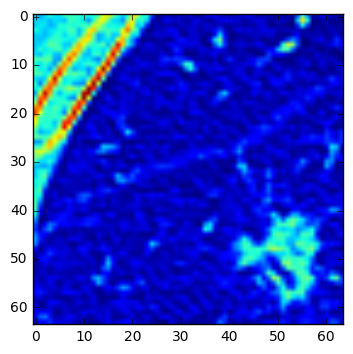

In [115]:
plt.imshow(np.reshape(img[0] , newshape=(64,64)))

# Malignant2

In [116]:
mal_aug_path='/home/user01/hdd1/ASAN_Mal_crop_aug/'
benign_aug_path='/home/user01/hdd1/ASAN_Benign_crop_aug/'
mal_file_paths=crawl_folder(mal_aug_path)
img=np.load(mal_file_paths[1000])
print np.shape(img)


KeyboardInterrupt: 

In [117]:
print mal_file_paths[0]
print mal_file_paths[1]

lab=np.load(mal_file_paths[1001])
print lab

/home/user01/hdd1/ASAN_Mal_crop_aug//001_3518_crop_target_3518_np_img.npy
/home/user01/hdd1/ASAN_Mal_crop_aug//001_3518_crop_target_3518_np_lab.npy
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


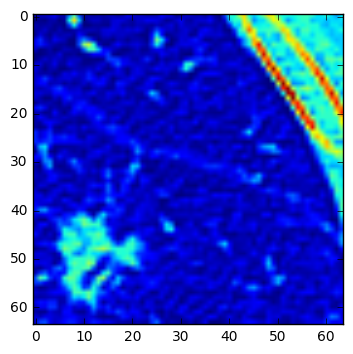

In [118]:
plt.imshow(np.reshape(img[1] , newshape=(64,64)))

# Verify Benign

In [119]:
benign_aug_path='/home/user01/hdd1/ASAN_Benign_crop_aug/'
benign_file_paths=crawl_folder(benign_aug_path)
print '# malignant : ',len(benign_file_paths)
for i in range(388):
    print i
    img=np.load(benign_file_paths[i])
    if np.shape(img)[1] != 64 and  len(np.shape(img)) ==4:
        print benign_file_paths[i*2]
        print benign_file_paths[i*2+1]


# malignant :  388
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


KeyboardInterrupt: 

In [120]:
benign_aug_path='/home/user01/hdd1/ASAN_Benign_crop_aug/'
benign_file_paths=crawl_folder(benign_aug_path)
img=np.load(benign_file_paths[18])
print np.shape(img)


(3888, 64, 64, 1)


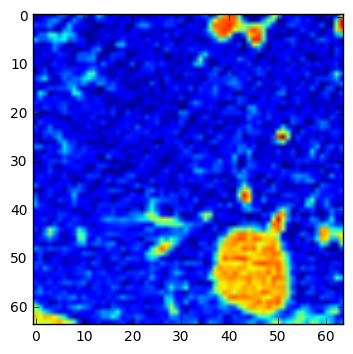

In [121]:
plt.imshow(np.reshape(img[18] , newshape=(64,64)))

In [122]:
normal_folder_path = '/home/user01/hdd1/slice_normal/'
mal_folder_path = '/home/user01/hdd1/ASAN_Mal_crop_aug/'
benign_folder_path = '/home/user01/hdd1/ASAN_Benign_crop_aug/' 

mal_paths = crawl_folder(mal_folder_path)
benign_paths = crawl_folder(benign_folder_path)
normal_paths =crawl_folder(normal_folder_path)
    

In [123]:
def get_image_lab_path(paths):
    ret_img_list=[]
    ret_lab_list=[]

    for i,path in enumerate(paths):
        if 'img' in path:
            ret_img_list.append(path)
        if 'lab' in path:
            ret_lab_list.append(path)
    return ret_img_list , ret_lab_list
def get_numpy_path(paths):
    ret_numpy_list=[]

    for i,path in enumerate(paths):
        if '.npy' in path:
            ret_numpy_list.append(path)
    return ret_numpy_list

In [124]:
mal_img_paths , mal_lab_paths=get_image_lab_path(mal_paths)
benign_img_paths , benign_lab_paths=get_image_lab_path(benign_paths)
normal_img_paths=get_numpy_path(normal_paths)

(64, 64)
(64, 64, 1)


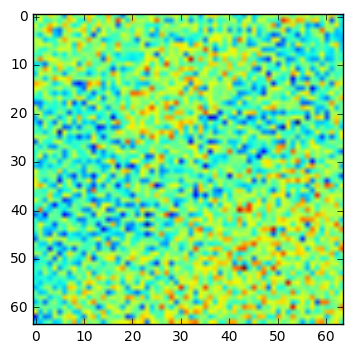

In [157]:
img=np.load(normal_img_paths[6])
plt.imshow(img)
print np.shape(img)

img = np.expand_dims(img , axis =3)
print np.shape(img)

# Normal Vs Cancer 

In [125]:
a=np.array([[0,1]])
np.shape(a)

(1, 2)

In [190]:
row = 64 ; col=64; color_ch =1;n_pic=200 
a=np.random.choice(2, 10)
ret_imgs = np.zeros([200 , row , col , color_ch ])
ret_labs = np.zeros([200, 2])
count=0
for i,ele in enumerate(a):
    print i
    if ele ==0: #malignant
        cancer_ind=random.randint(0,2)
        if(cancer_ind ==0):
            ind=random.randint(0,len(mal_img_paths))
            mal_img=np.load(mal_img_paths[ind])
            mal_inds=np.random.choice(len(img) ,20)
            for ele in inds:
                ret_imgs[count]=mal_img[ele]
                ret_labs[count,0] =1 
                count +=1
        elif (cancer_ind ==1):
            ind=random.randint(0,len(benign_img_paths))
            benign_img=np.load(benign_img_paths[ind])
            benign_inds=np.random.choice(len(benign_img) ,20)
            for ele in benign_inds:
                return_imgs[count]=benign_img[ele]
                labs[count,0] =1
                count +=1
    elif ele==1:#normal
        for j in range(20):
            ind=random.randint(0,len(normal_img_paths))
            print 'nomral ,' ,ind

            img=np.load(normal_img_paths[ind])
            if len(np.shape(img))==2:
                img=np.expand_dims(img , axis =3)
            imgs[count]=img
            labs[count,1] = 1
            count +=1



0
nomral , 759828
nomral , 705718
nomral , 148323
nomral , 371817
nomral , 406040
nomral , 863581
nomral , 641605
nomral , 530040
nomral , 388114
nomral , 657934
nomral , 477840
nomral , 384732
nomral , 159657
nomral , 912437
nomral , 665115
nomral , 621323
nomral , 282120
nomral , 90512
nomral , 2752
nomral , 59252
1
nomral , 746797
nomral , 749762
nomral , 47149
nomral , 318549
nomral , 149527
nomral , 328799
nomral , 286493
nomral , 220017
nomral , 908256
nomral , 586156
nomral , 452424
nomral , 17439
nomral , 210295
nomral , 874129
nomral , 518569
nomral , 454099
nomral , 22850
nomral , 317849
nomral , 469423
nomral , 193628
2
3
4
nomral , 220905
nomral , 267555
nomral , 618469
nomral , 272956
nomral , 741572
nomral , 739421
nomral , 210259
nomral , 544303
nomral , 384499
nomral , 341632
nomral , 800485
nomral , 735082
nomral , 442277
nomral , 84345
nomral , 8814
nomral , 851886
nomral , 194972
nomral , 549114
nomral , 694078
nomral , 856837
5
nomral , 300912
nomral , 201864
nomral

[ 0.  0.]


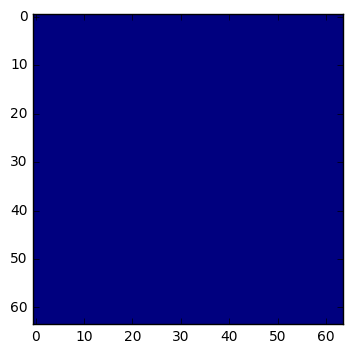

In [192]:
plt.imshow(np.reshape(imgs[180] , newshape=(64,64)))
print labs[180]